<img src="datamecum_logo.png" align="right" style="float" width="400">
<font color="#CA3532"><h1 align="left">Programa técnico intensivo en data science. Datamecum.</h1></font>
<font color="#6E6E6E"><h2 align="left">SVM</h2></font> 

# Reconocimiento Facial

In [7]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

In [8]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [9]:
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [34]:
import pandas as pd
pd.Series(faces["target"]).value_counts()

3    530
1    236
7    144
2    121
4    109
0     77
5     71
6     60
dtype: int64

In [37]:
faces["target_names"]

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

In [10]:
print(faces.images.shape)

(1348, 62, 47)


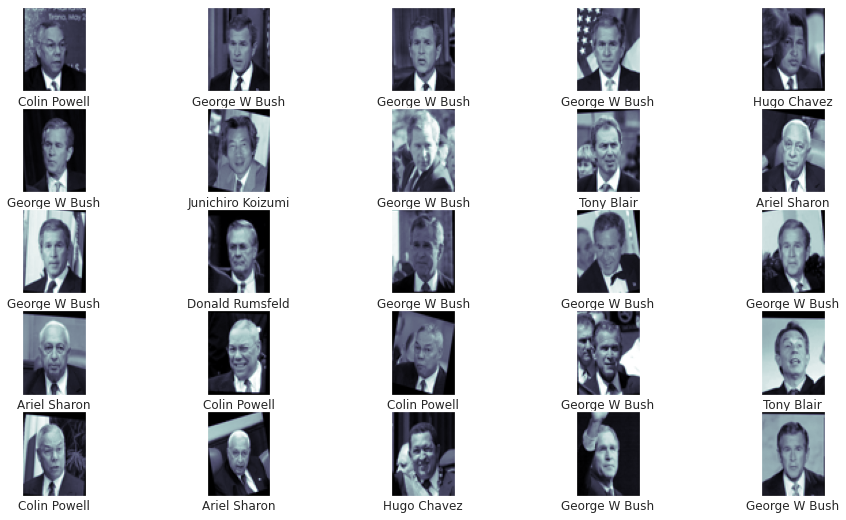

In [11]:
fig, ax = plt.subplots(5,5, figsize=(16,9))
for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(faces.images[i], cmap="bone")
    ax_i.set(xticks=[], yticks=[],xlabel=faces.target_names[faces.target[i]])

In [12]:
62*47

2914

In [13]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(faces.data, faces.target, random_state = 42)

In [22]:
from sklearn.model_selection import GridSearchCV
parameters =    [{
        'kernel': ['rbf'],
        'C': [1,10]
    }]
clf = GridSearchCV(SVC(), param_grid=parameters, cv=5)


In [25]:
classifier = clf.fit(Xtrain,Ytrain)
yfit = classifier.predict(Xtest)

Text(0.5, 0.98, 'Predicciones de las imágnes (incorrectas en rojo)')

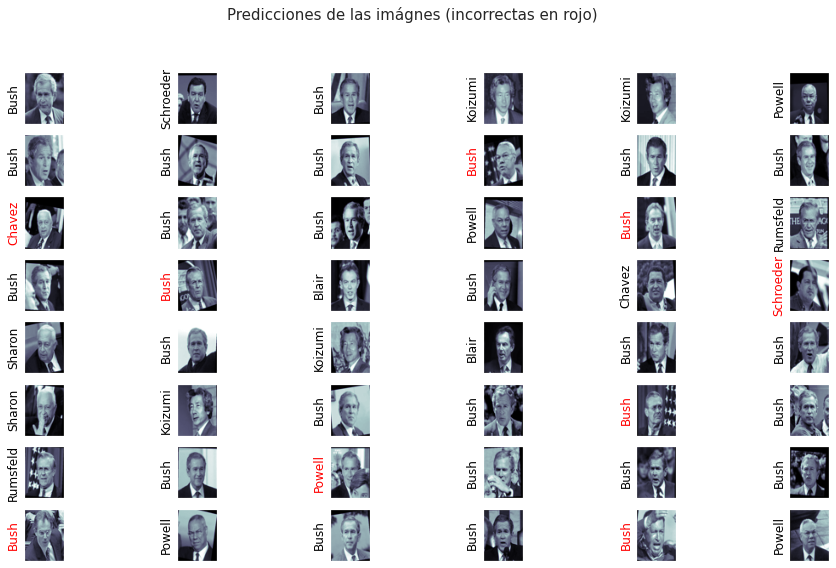

In [26]:
fig, ax = plt.subplots(8,6,figsize=(16,9))

for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(Xtest[i].reshape(62,47), cmap="bone")
    ax_i.set(xticks=[], yticks=[])
    ax_i.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color = "black" if yfit[i]==Ytest[i] else "red")

fig.suptitle("Predicciones de las imágnes (incorrectas en rojo)", size = 15)

In [27]:
print(classification_report(Ytest, yfit, target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.93      0.87      0.90        15
     Colin Powell       0.89      0.79      0.84        68
  Donald Rumsfeld       0.80      0.52      0.63        31
    George W Bush       0.70      0.92      0.79       126
Gerhard Schroeder       0.67      0.70      0.68        23
      Hugo Chavez       0.57      0.20      0.30        20
Junichiro Koizumi       0.70      0.58      0.64        12
       Tony Blair       0.77      0.64      0.70        42

         accuracy                           0.75       337
        macro avg       0.75      0.65      0.68       337
     weighted avg       0.76      0.75      0.74       337



In [28]:
mat = confusion_matrix(Ytest, yfit)

<AxesSubplot:>

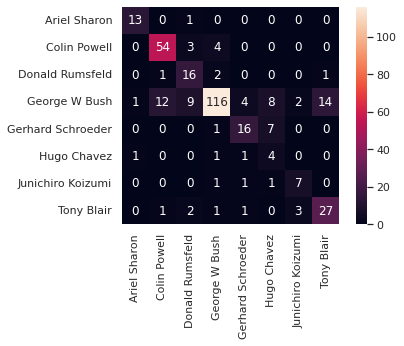

In [29]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=faces.target_names, yticklabels=faces.target_names )